## Company Information:
The data set is based upon <a src="https://www.kaggle.com/prateikmahendra/loan-data"> Lending Club Information </a>. 
- TheIrish Dummy Banks  is a  peer to peer lending bank based in the ireland, in which bank provide funds for potential borrowers and bank earn a profit depending on the risk they take (the borrowers credit score). Irish Fake bank provides loan to their loyal customers. The complete data set is borrowed from Lending Club For more basic information about the company please check out the wikipedia article about the company. This dataset is copied and clean from kaggle but it has been changed. The any kind of similarity is just for learning purposes. I dont have any intention for palgrisim I just like to be clear myself. <br><br>


<a src="https://en.wikipedia.org/wiki/Lending_Club"> Lending Club Information </a>



#### Import our libraries we are going to use for our data analysis.

In [14]:
# Import our libraries we are going to use for our data analysis.
import tensorflow as tf
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# Plotly visualizations
from plotly import tools
import plotly.plotly as py
import plotly.figure_factory as ff
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)


# For oversampling Library (Dealing with Imbalanced Datasets)
from imblearn.over_sampling import SMOTE
from collections import Counter
from IPython.display import HTML
import warnings; warnings.simplefilter('ignore')


% matplotlib inline

df = pd.read_csv("C:/Users/mrferozi/Documents/Panada_ml/loan/lending-club-loan-data/loan_final313.csv",low_memory=False, index_col=0)

# Copy of the dataframe
original_df = df.copy()

import warnings; warnings.simplefilter('ignore')

In [15]:
df.dtypes

year                      int64
issue_d                  object
final_d                   int64
emp_length_int          float64
home_ownership           object
home_ownership_cat        int64
income_category          object
annual_inc                int64
income_cat                int64
loan_amount               int64
term                     object
term_cat                  int64
application_type         object
application_type_cat      int64
purpose                  object
purpose_cat               int64
interest_payments        object
interest_payment_cat      int64
loan_condition           object
loan_condition_cat        int64
interest_rate           float64
grade                    object
grade_cat                 int64
dti                     float64
total_pymnt             float64
total_rec_prncp         float64
recoveries              float64
installment             float64
region                   object
dtype: object

### Classification Accuracy (Logistic Regression)

- That is mean that all features have equal importance

### Create a list of features

In [16]:
# create a list of features
feature_cols = ['emp_length_int', 'annual_inc','loan_amount',
                'interest_rate','dti','home_ownership_cat',
               'income_cat','total_pymnt','purpose_cat','grade_cat',
               'application_type_cat','term_cat','year']

In [17]:
X = df[feature_cols]
y = df.loan_condition_cat

### Spilt data into training and testing sets

In [18]:
## Modeling process
# spilt X and y into training and testing sets
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

### Train a logistic regression model on the training set

In [19]:
# train a logistic regression model on the training set
from sklearn.linear_model import LogisticRegression
Logreg = LogisticRegression()
Logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

### Make class prediction for the testing set

In [20]:
# make class prediction for the testing set
y_pred_class = Logreg.predict(X_test)

- Classification Accuracy : percentage of correct prediction

### Calculate Accuracy

In [8]:
# calculate Accuracy
from sklearn import metrics
print((metrics.accuracy_score(y_test, y_pred_class))*100)

92.33518898329916


- Null accuracy : accuracy that could be achieved by always predicting the most frequent class

- In the case where the classes are perfectly balanced (meaning the prevalence is 50%), the positive predictive value (PPV) is equivalent to precision. ... In other words, a model will have a high Kappa score if there is a big difference between the accuracy and the null error rate

### Examine the class distribution of the testing set (using panda series method)

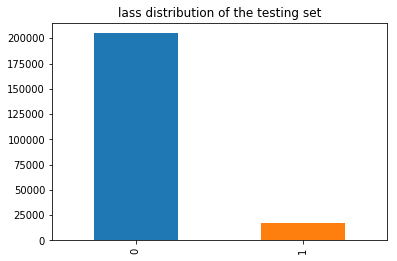

In [52]:
# examine the class distribution of the testing set (using panda series method)
s = y_test.value_counts()
s.plot(kind='bar', title='lass distribution of the testing set')

- System Predict Good loan = 204841 and Bad Loan =  17004

### Average prediction

In [10]:
y_test.mean()

0.0766481101670085

In [11]:
# calculate the percentage of zeros
print ((1- y_test.mean())*100)

92.33518898329916


In [12]:
# claculate null accuracy ( for binary classification problem coded as 0/1)
print (max(y_test.mean(), 1- y_test.mean()))

0.9233518898329915


- Comparing the true and predicted response values

In [13]:
# print the first 25 true and predicted responses
from __future__ import print_function
print('True:', y_test.values[0:25])
print('Pred:', y_pred_class[0:25])

True: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Pred: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


**Conclusion:**

- Classification accuracy is the **easiest classification metric to understand**
- But, it does not tell you the **underlying distribution** of response values
- And, it does not tell you what **"types" of errors** your classifier is making

### Train a logistic regression model on the training set

In [21]:
# train a logistic regression model on the training set
from sklearn.linear_model import LogisticRegression
Logreg = LogisticRegression()
Logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

### Make class prediction for the testing set

In [22]:
# make class prediction for the testing set
y_pred_class_train = Logreg.predict(X_train)

- Classification Accuracy : percentage of correct prediction

In [23]:
# calculate Accuracy
from sklearn import metrics
print((metrics.accuracy_score(y_train, y_pred_class_train))*100)

92.42337731806339


### Examine the class distribution of the traing set (using panda series method)

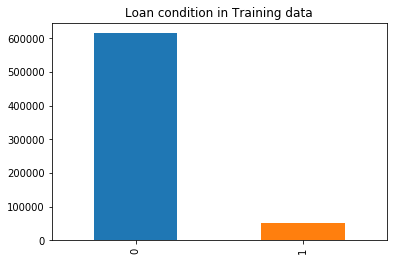

In [40]:
# examine the class distribution of the traing set (using panda series method)
b = y_train.value_counts()
b.plot(kind='bar',title='Loan condition in Training data')

### Examine the class distribution of the testing set (using panda series method)

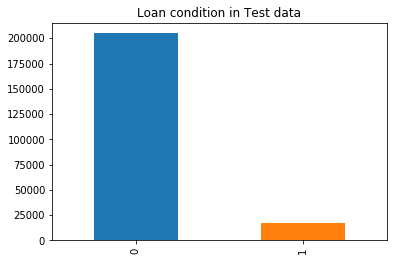

In [41]:
# examine the class distribution of the testing set (using panda series method)
a = y_test.value_counts()
a.plot(kind='bar',title='Loan condition in Test data')

### Total loan status cross Tab

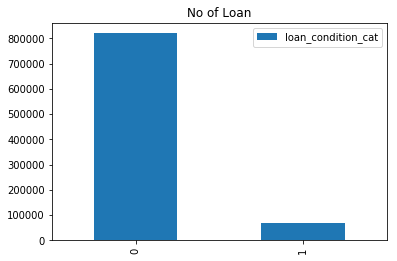

In [38]:
# loan_status cross
loan_cross_tab = pd.DataFrame(a+b)
loan_cross_tab.plot(kind='bar', title='No of Loan')

### Calculate the percentage of zeros

In [46]:
# calculate the percentage of zeros
print ((1- y_train.mean())*100)

92.42337731806339


### Claculate null accuracy

In [44]:
# claculate null accuracy ( for binary classification problem coded as 0/1)
print ((max(y_train.mean(), 1- y_train.mean()))*100)

92.42337731806339


In [47]:
# print the first 25 true and predicted responses
from __future__ import print_function
print('True:', y_train.values[0:25])
print('Pred:', y_pred_class_train[0:25])

True: [0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0]
Pred: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


As we could see that it is prediciting two bad loan in train set as compare to test data. The both result are correct because all prediction depend on the data provided in train and test.

In [48]:
# print the first 25 true and predicted responses
from __future__ import print_function
print('True:', y_test.values[0:25])
print('Pred:', y_pred_class[0:25])

True: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Pred: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
